In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

2-sigma: 95.5 percent

3-sigma: 99.73 percent

4-sigma: 99.993 percent

5-sigma: 99.99994 percent

In [2]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
# or: requests.get(url).content

resp = urlopen("http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip")
zipfile = ZipFile(BytesIO(resp.read()))

ff = pd.read_csv(zipfile.open('F-F_Research_Data_Factors_daily.CSV'), 
                     header = 0, names = ['Date','MKT-RF','SMB','HML','RF'], 
                     skiprows=3)

#Drop last row of data - String
ff = ff[:ff['Date'].count() - 1]
ff['Date'] = pd.to_datetime(ff['Date'], format = "%Y%m%d")
ff.set_index('Date', inplace=True)
ff = ff.astype('float')

In [16]:
ff['MKT-RF'].sort_values().head(20).sort_index()

Date
1929-10-28   -11.29
1929-10-29   -12.01
1929-11-06    -9.75
1932-05-31    -6.82
1932-10-05    -7.33
1933-07-20    -8.49
1933-07-21    -9.21
1934-07-26    -7.13
1937-10-18    -8.20
1940-05-14    -7.21
1940-05-21    -6.99
1946-09-03    -6.90
1962-05-28    -7.00
1987-10-19   -17.44
1987-10-26    -8.31
2008-09-29    -8.26
2008-10-09    -7.36
2008-10-15    -8.78
2008-12-01    -8.95
2011-08-08    -6.97
Name: MKT-RF, dtype: float64

In [9]:
sigma_events = [i * ff['MKT-RF'].describe()['std'] for i in range(0,5)]

In [10]:
fs = sigma_events[4]

In [12]:
fsd = ff[ff['MKT-RF'].apply(lambda x: abs(x)) > fs]

In [13]:
fsd['MKT-RF'].count() / FFdata['MKT-RF'].count() * 100

0.7485525227460712

In [14]:
allmktr = FFdata['MKT-RF'].apply(abs).sum()
fsr = fsd['MKT-RF'].apply(abs).sum()

In [15]:
(fsr/allmktr) * 100

6.591023637387818

In [16]:
FFdata['MKT-RF'].count() * (100-99.99994)/100

0.014508000001168853

In [17]:
FFdata.index = pd.to_datetime(FFdata.index)

In [18]:
ff = FFdata.copy()

In [19]:
fsd['MKT-RF'].apply(abs).sum()

1089.3400000000001

In [20]:
ff['MKT-RF'].apply(abs).sum()

16527.63

In [21]:
ff['RF'].count()

24180

In [22]:
nfsd = fsd[fsd['MKT-RF'] < 0]

In [23]:
ff['Is5Std'] = ff['MKT-RF'].apply(abs) > fs

In [26]:
ff['ModRet'] = ff.apply(lambda row: 0 if row['Is5Std'] else row['MKT-RF'],axis=1)
ff['CModRet'] = ff['ModRet'].cumsum()
ff['MKT-RFC'] = ff['MKT-RF'].cumsum()

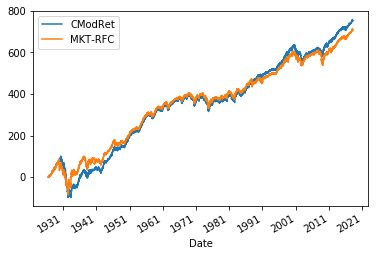

In [27]:
ff[['CModRet', 'MKT-RFC']].plot()

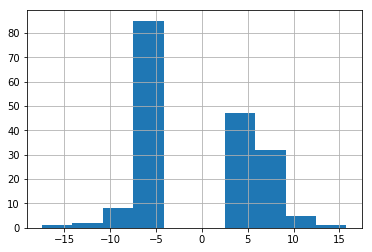

In [146]:
fsd['MKT-RF'].hist()

In [154]:
days = ff.count()['MKT-RF']

In [156]:
days * (1-.9999994)

0.014508000000417187

In [157]:
fsd['MKT-RF'].count()

181

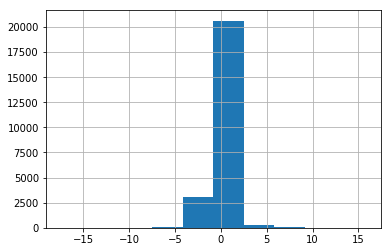

In [158]:
ff['MKT-RF'].hist()

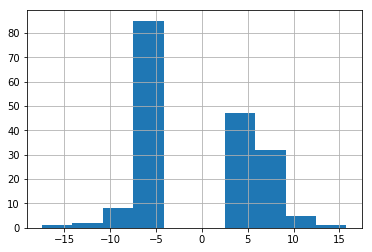

In [160]:
fsd['MKT-RF'].hist()

In [29]:
mr = ff[['MKT-RF']]

In [37]:
ff.head()

,MKT-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.24,-0.28,0.009
1926-07-02,0.45,-0.32,-0.08,0.009
1926-07-06,0.17,0.27,-0.35,0.009
1926-07-07,0.09,-0.59,0.03,0.009
1926-07-08,0.21,-0.36,0.15,0.009


In [189]:
def plot_returns_ex_days(returns, 
                         best = True, 
                         no_days = 10,
                         return_column = 'MKT-RF',
                         start_date = '1926-07-01'):
    returns = returns.copy()
    
    rl = returns.sort_values(
        return_column
    )[
        return_column
    ].tolist()
    
    if(best):
        rl[(no_days * -1):] = np.zeros(no_days)
    else:
        rl[(no_days * -1):]

    returns.sort_values(return_column, inplace=True)
    
    returns['ModifiedReturn'] = rl
    
    returns.sort_index(inplace=True)
    
    result =returns[[return_column, 'ModifiedReturn']].cumsum()
    result.columns = ['Return', 'ModifiedReturn']
    print(result['Return'].values[-1], result['ModifiedReturn'].values[-1])
    return result

In [190]:
a = np.zeros(100)
a[:-20] = np.nan

In [205]:
mr = plot_returns_ex_days(ff, no_days=242)

709.530000000001 -372.94000000000085


Return            24180
ModifiedReturn    24180
dtype: int64

In [204]:
(241.8/24180) * 100

1.0

241.8